In [7485]:
# conda venv (python 3.11)
# pip install ipykernel __ for config jupyter kernel
# pip install lxml __ for parsing xml dataset
# pip install openpyxl __ for read xlsx to csv
# pip install beautifulsoup4 __ for crawling
# pip install requests __ HTTP requests for crawling
# pip install haversine __ for cal distance
# pip install matplotlib __ for visualize data
# pip install scikit-learn  __ for Lin-Reg model
# pip install xgboost __ for classification model
# pip install eli5 __ for visualize permutation importance

In [7486]:
# matplotlib폰트설정
from matplotlib import font_manager, rc
font_path = "C:\\Windows\\Fonts\\HANDotum.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

In [7487]:
import pandas as pd
pd.set_option('mode.chained_assignment',  None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7488]:
member = pd.read_csv('dataproc\\member.csv', index_col=0)
schedule = pd.read_csv('dataproc\\schedule2022.csv', index_col=0)
ticket = pd.read_csv('dataproc\\ticket.csv', index_col=0)

In [7489]:
member.head(5)

,MB_IDX,MB_AGE,job,favorite_idx,admin_name2,dist
0,112,39,NaN,무고사,도봉구,39.985363
1,137,38,회사원(사무직/연구직),정혁,서구,3.981266
2,153,63,자영업자,김도혁,남동구,8.374205
3,180,38,NaN,아길라르,광진구,40.696620
4,208,29,교사,김도혁,강화군,33.177444


In [7490]:
# 멤버십에 가장 많은 비중을 차지하는 나이
member.MB_AGE.value_counts()[member.MB_AGE.value_counts() == member.MB_AGE.value_counts().sort_index().max()]

15    727
Name: MB_AGE, dtype: int64

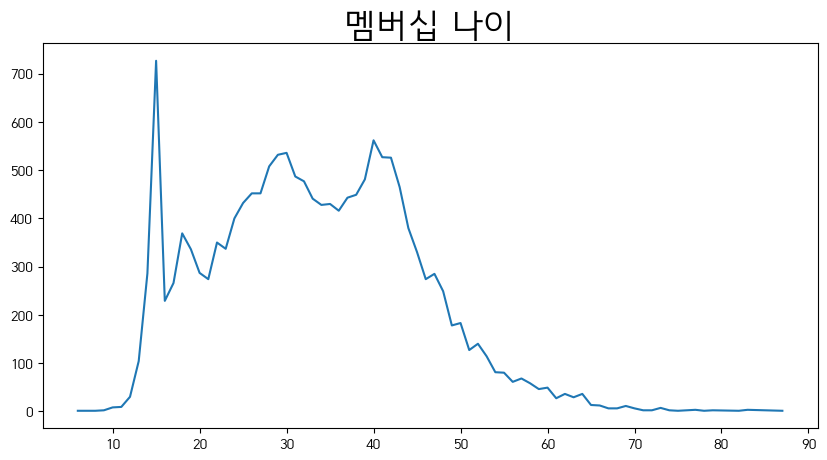

In [7491]:
x = member.MB_AGE.value_counts().sort_index().index
y = member.MB_AGE.value_counts().sort_index()
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,y)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('멤버십 나이', fontdict=title_font)
plt.show()

고객 풀이 많은 나이대는 15세전후, 30세전후, 40세전후로 <br>
15세전후 = 유소년<br>
30세전후 = 청년<br>
40세전후 = 유소년 자녀를 가진 부모세대 + 중년층 팬덤<br>
대략적인 고객층을 알 수 있다.

In [7492]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y
0,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),Y,6706.0,주말,2
1,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
2,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
3,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
4,3281,2022-02-19,16:30:00,Exciting석,성인,Y,4522.0,주말,2
...,...,...,...,...,...,...,...,...,...
53204,139589,2022-10-16,19:00:00,Exciting석,성인,N,-5.0,주말,4
53205,139589,2022-10-16,19:00:00,Exciting석,청소년/어린이,N,-5.0,주말,4
53206,151984,2022-10-16,19:00:00,원정석,성인,N,-16.0,주말,4
53207,118329,2022-10-16,19:00:00,S석,성인,N,-26.0,주말,4


In [7493]:
ticketing = pd.DataFrame(ticket.groupby(['membership_no'])['game_date'].count()).rename(columns={'game_date':'ticketing'}) # 유저별 티켓팅 시도횟수
cancel = pd.DataFrame(ticket[ticket.cancel_yn == 'Y'].groupby(['membership_no'])['game_date'].count()).rename(columns={'game_date':'ticketing'}) # 유저별 티켓팅 취소횟수
member = pd.merge(member, ticketing, how='left', left_on='MB_IDX', right_on='membership_no') # merge table
member = pd.merge(member, cancel, how='left', left_on='MB_IDX', right_on='membership_no') # merge table
member.rename(columns={'ticketing_x':'ticketing', 'ticketing_y':'cancel'},inplace=True)
member['cancelrate'] = round((member.cancel / member.ticketing)*100,2)
member.fillna({'ticketing':0, 'cancel':0, 'cancelrate':0}) # 결측치 0 대체

,MB_IDX,MB_AGE,job,favorite_idx,admin_name2,dist,ticketing,cancel,cancelrate
0,112,39,NaN,무고사,도봉구,39.985363,0.0,0.0,0.00
1,137,38,회사원(사무직/연구직),정혁,서구,3.981266,4.0,2.0,50.00
2,153,63,자영업자,김도혁,남동구,8.374205,12.0,0.0,0.00
3,180,38,NaN,아길라르,광진구,40.696620,3.0,0.0,0.00
4,208,29,교사,김도혁,강화군,33.177444,28.0,13.0,46.43
...,...,...,...,...,...,...,...,...,...
15966,151992,22,기타,김보섭,부평구,8.541045,0.0,0.0,0.00
15967,151993,41,회사원(사무직/연구직),에르난데스,김포시,19.044095,0.0,0.0,0.00
15968,151993,41,회사원(사무직/연구직),에르난데스,김포시,19.279448,0.0,0.0,0.00
15969,151994,16,학생(초/중/고),에르난데스,계양구,11.413215,0.0,0.0,0.00


In [7494]:
member.ticketing.sum() # 전체 티켓팅 수 일치

53458.0

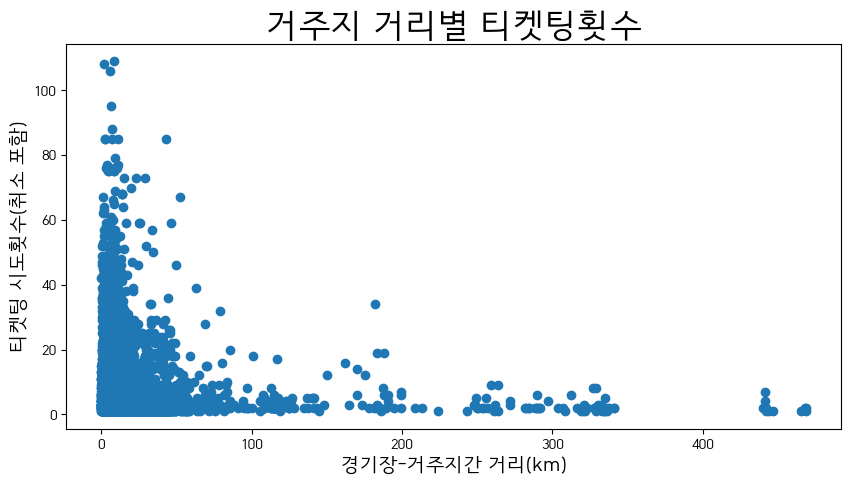

In [7495]:
X = member[member.ticketing > 0].dist
Y = member[member.ticketing > 0].ticketing
plt.title("Scatter Plot")
plt.scatter(X, Y)
plt.title('거주지 거리별 티켓팅횟수', fontdict=title_font)
label_font = {
    'fontsize': 14,
}
plt.xlabel('경기장-거주지간 거리(km)', fontdict=label_font)
plt.ylabel('티켓팅 시도횟수(취소 포함)', fontdict=label_font)
plt.show()

Text(0, 0.5, '예매 이탈률(%)')

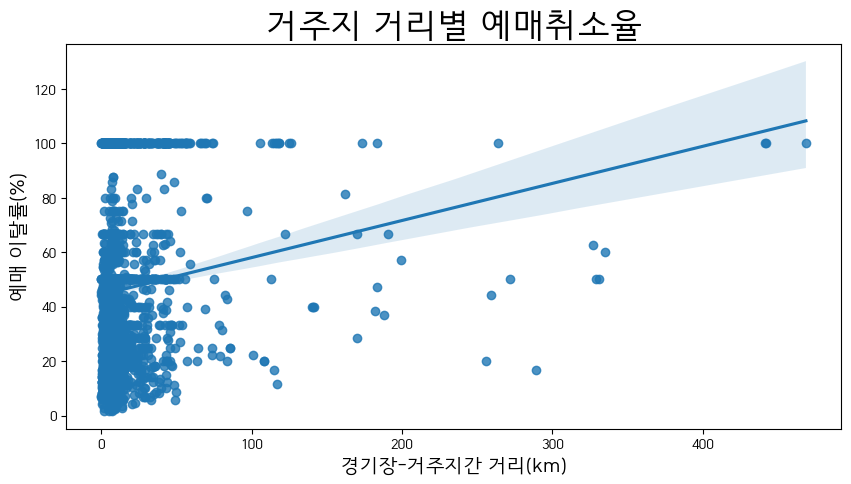

In [7496]:
ax = sns.regplot(x='dist', y='cancelrate', data=member[(member.ticketing > 0)])
plt.title('거주지 거리별 예매취소율', fontdict=title_font)
plt.xlabel('예매취소율')
plt.ylabel('예매취소율')
label_font = {
    'fontsize': 14,
}
plt.gcf().set_size_inches(10,5)
plt.xlabel('경기장-거주지간 거리(km)', fontdict=label_font)
plt.ylabel('예매 이탈률(%)', fontdict=label_font)

Text(0, 0.5, '예매 이탈률(%)')

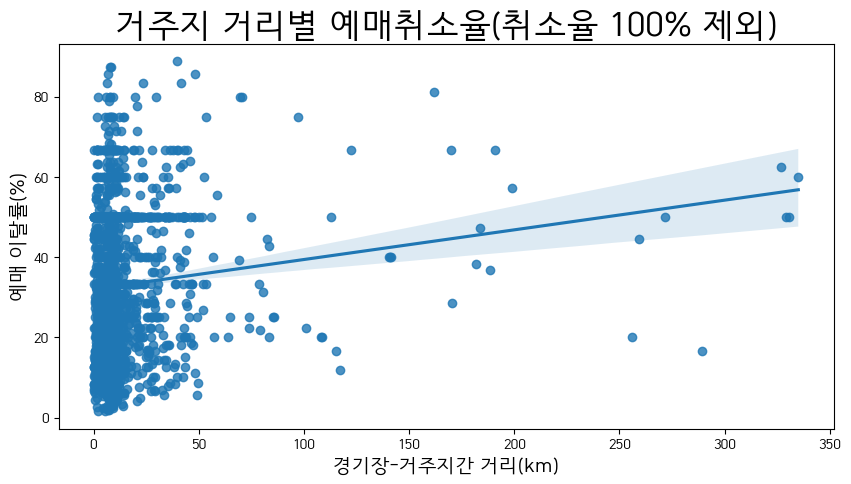

In [7497]:
ax = sns.regplot(x='dist', y='cancelrate', data=member[(member.ticketing > 0) & (member.cancelrate < 100)])
plt.title('거주지 거리별 예매취소율(취소율 100% 제외)', fontdict=title_font)
plt.xlabel('예매취소율')
plt.ylabel('예매취소율')
label_font = {
    'fontsize': 14,
}
plt.gcf().set_size_inches(10,5)
plt.xlabel('경기장-거주지간 거리(km)', fontdict=label_font)
plt.ylabel('예매 이탈률(%)', fontdict=label_font)

Text(0, 0.5, '티켓팅 시도횟수(취소 포함)')

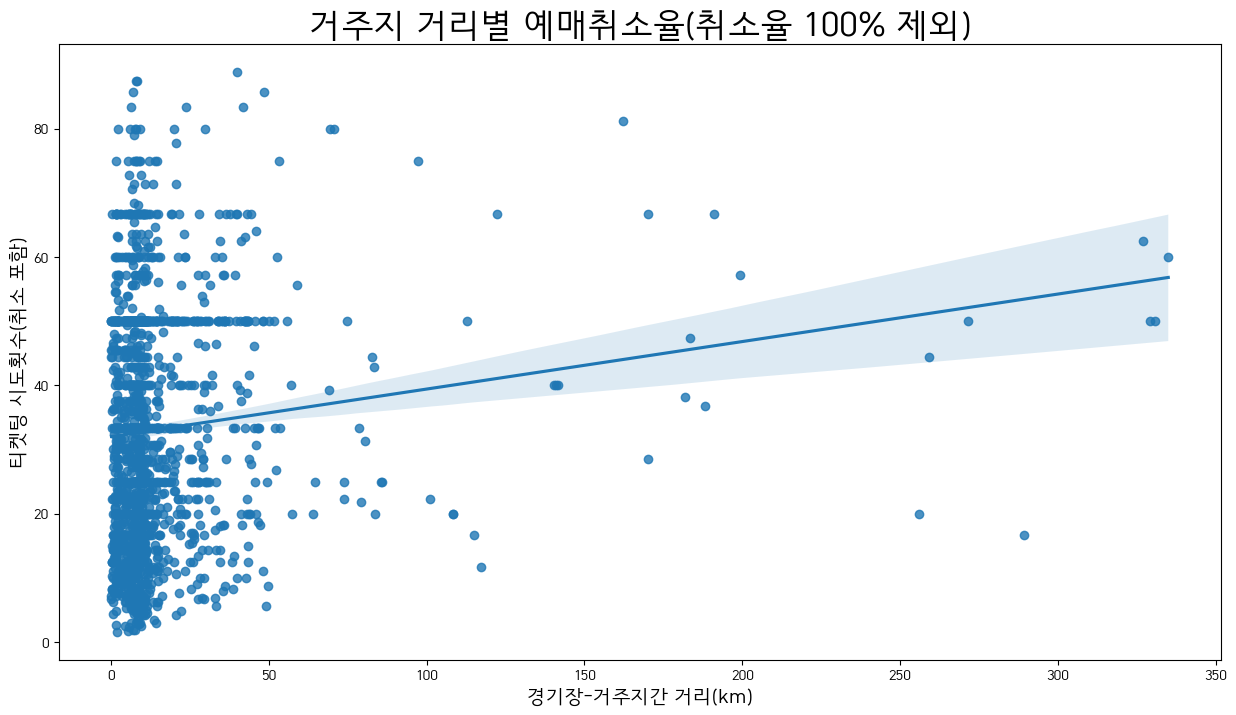

In [7498]:
ax = sns.regplot(x='dist', y='cancelrate', data=member[(member.ticketing > 0) & (member.cancelrate < 100)])
plt.title('거주지 거리별 예매취소율(취소율 100% 제외)', fontdict=title_font)
plt.xlabel('예매취소율')
plt.ylabel('예매취소율')
label_font = {
    'fontsize': 14,
}
plt.gcf().set_size_inches(15, 8)
plt.xlabel('경기장-거주지간 거리(km)', fontdict=label_font)
plt.ylabel('티켓팅 시도횟수(취소 포함)', fontdict=label_font)

# 예매시도횟수와 예매 이탈률 요인분석(경기장-거주지 간 거리)
이탈률 100% (2022년 기준 실 예매0회 고객) 제외기준으로 보더라도<br>
경기장 인근 거주 고객은 30%중반의 이탈률을 보이고있고,<br>
경기장에서 거주지가 멀수록 이탈률을이 50%근처까지 올라가는것을 볼 수 있음.<br>

solution)<br>
자가 이용시 주차시설물 편의성 점검 및 주차혜택<br>
거리기반 경기당일 N시간 전 출발 리마인드 서비스<br>
경기장 사전도착 유도를 위한 지역관광연계(생태공원, 박물관 등 지역관광재 할인쿠폰)

In [7499]:
goaldiff = list(schedule.goal_diff)
goaldiff.insert(0,0)
goaldiff.pop()
schedule['last_diff'] = goaldiff

In [7500]:
schedulehome = schedule[schedule.home == True]

In [7501]:
schedulehome.head(5)

,date,weekday,game_time,field_name,game_type_name,audience,home,opponent,goal_incheon,goal_diff,ranking,last_diff
0,2022-02-19,주말,16:30,인천,스플릿일반,5382,True,수원,1,1,2,0
1,2022-02-26,주말,14:00,인천,스플릿일반,4618,True,서울,1,0,4,1
3,2022-03-05,주말,19:00,인천,스플릿일반,3581,True,포항,0,-1,4,1
4,2022-03-13,주말,14:00,인천,스플릿일반,2607,True,김천,1,1,3,-1
6,2022-04-02,주말,14:00,인천,스플릿일반,7054,True,울산,1,0,2,1


In [7502]:
schedulehome.game_time = schedulehome.game_time.str.slice(0, 2)

In [7503]:
ticketing = pd.DataFrame(ticket[ticket.cancel_yn == 'Y'].groupby(['membership_no'])['game_date'].count()).rename(columns={'game_date':'ticketing'})
ticketing

,ticketing
membership_no,
137,2
208,13
291,4
420,3
803,7
...,...
151914,2
151917,2
151923,4


In [7504]:
schedulehome.drop(columns=['date','field_name','game_type_name','opponent','goal_diff','home','goal_incheon'], inplace=True)

In [7505]:
schedulehome

,weekday,game_time,audience,ranking,last_diff
0,주말,16,5382,2,0
1,주말,14,4618,4,1
3,주말,19,3581,4,1
4,주말,14,2607,3,-1
6,주말,14,7054,2,1
8,주말,16,5234,2,1
10,공휴일,16,7597,4,0
12,평일,19,2754,3,0
14,주말,16,6119,4,-2
16,평일,19,2509,4,-1


반영한 특성)<br>
weekday(공휴일/주말/평일)<br> 
game_time(24시표기법 기준 경기시작시간)	<br>
ranking(경기당일 인천FC 순위)	<br>
last_diff(지난경기 골득실)<br>

In [7506]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# 경기 수요예측모델
X_train, X_test, y_train, y_test = train_test_split(schedulehome.drop('audience', axis=1), schedulehome['audience'], test_size=0.2, random_state=0)

categorical_features = ['weekday']
numeric_features = ['game_time', 'ranking', 'last_diff']
preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge(alpha=0.1))])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('R-squared:', score)

R-squared: 0.8931644312861683


In [7507]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

X_train_processed = np.concatenate([X_train_encoded, X_train_scaled], axis=1)
X_test_processed = np.concatenate([X_test_encoded, X_test_scaled], axis=1)

# Create a Ridge model with regularization
alpha = 1.0
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_processed, y_train)

# Evaluate the model on the testing data
y_pred = model.predict(X_test_processed)
score = model.score(X_test_processed, y_test)

# Print the R-squared value of the model
print('R-squared:', score)

R-squared: 0.8946922224458308


c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7509]:
X_train_processed[0] # 앞의 3개 원소는 원핫인코딩된 weekday속성, 뒤의 4개 원소는 각각 'game_time', 'ranking', 'last_diff'의 결정계수

c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([0.        , 0.        , 1.        , 0.71443451, 0.60302269,
       1.937644  ])

In [7510]:
encoder.categories_ # 앞의 3개원소 순서는 공휴일, 주말, 평일

[array(['공휴일', '주말', '평일'], dtype=object)]

In [7511]:
import numpy as np
model.coef_ # 1번(공휴일), 3번(평일여부), 4번(경기시간(표준24시)) 

array([ 2424.8195755 ,   575.53003603, -3000.34961153,   829.73957076,
        -152.0682518 ,  -155.02484078])

# 관객수에 영향을 주는 요인 분석
***공휴일여부***(coef : 2424), ***평일여부***(coef : -3000), ***경기시작시간***(coef : 829) 순으로 관객수가 결정지어짐.<br>
경기 당일 순위나 지난경기 골득실은 크게 영향을 미치지않음<br>
<br>
**(결정계수 > 0)**<br>
공휴일 일수록 관객 수 증가<br>
경기시작시간이 늦을수록 관객 수 증가<br>
<br>
**(결정계수 < 0)**<br>
평일 일수록 관객수 하락

solution)<br>
연맹 K리그1 경기일정 수립시 인천의 홈 경기일정에 평일은 지양하고, 공휴일을 최대한 포함하도록 협상<br>
연맹이 정하는 범주가 일자까지라면, 경기시간대를 최대한 늦은시간대로(19시 이후)로 설정한다.

*제6조 (일정) : 본 대회는 2022.02.19(토)~10.23(일)에 개최하며, 경기일정(대진)은 연맹이 정한 경기일정표에 의한다...*<br>
*... 개별 **경기일**은 AFC 챔피언스리그 일정 등을 감안하여 연맹이 결정한다. (하나원큐 K리그1 2022 대회요강)*

In [7512]:
schedule = pd.read_csv('C:\\Develop\\Project7\\dataproc\\schedule2022.csv', usecols=['game_type_name','date', 'weekday', 'ranking'])

In [7513]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y
0,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),Y,6706.0,주말,2
1,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
2,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
3,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2
4,3281,2022-02-19,16:30:00,Exciting석,성인,Y,4522.0,주말,2
...,...,...,...,...,...,...,...,...,...
53204,139589,2022-10-16,19:00:00,Exciting석,성인,N,-5.0,주말,4
53205,139589,2022-10-16,19:00:00,Exciting석,청소년/어린이,N,-5.0,주말,4
53206,151984,2022-10-16,19:00:00,원정석,성인,N,-16.0,주말,4
53207,118329,2022-10-16,19:00:00,S석,성인,N,-26.0,주말,4


In [7514]:
weather = pd.read_csv('dataproc\\weather.csv', usecols=['date','avgtemp','rainfall'])
ticketweather = pd.merge(ticket, weather, how='left', left_on='game_date', right_on='date')

In [7515]:
ticketweather[ticketweather.cancel_yn=='Y'].rainfall.mean() # 취소한 티켓 날짜들의 강우량 평균(mm)

3.6762807094855137

In [7516]:
ticketweather[ticketweather.cancel_yn=='N'].rainfall.mean() # 관람한 티켓 날짜들의 강우량 평균(mm)

3.389567660654401

예매/취소 티켓의 강우량평균이 차이가 거의 없으므로 날씨 데이터는 예매취소에 영향을 주지않는것으로 예상됨

In [7517]:
del ticketweather

In [7518]:
ticket['game_date'] = pd.to_datetime(ticket['game_date'])

In [7519]:
ticket['event_weekday'] = ticket.game_date.dt.weekday

In [7520]:
ticket.game_date = ticket.game_date.astype(str)

In [7521]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y,event_weekday
0,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),Y,6706.0,주말,2,5
1,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5
2,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5
3,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5
4,3281,2022-02-19,16:30:00,Exciting석,성인,Y,4522.0,주말,2,5
...,...,...,...,...,...,...,...,...,...,...
53204,139589,2022-10-16,19:00:00,Exciting석,성인,N,-5.0,주말,4,6
53205,139589,2022-10-16,19:00:00,Exciting석,청소년/어린이,N,-5.0,주말,4,6
53206,151984,2022-10-16,19:00:00,원정석,성인,N,-16.0,주말,4,6
53207,118329,2022-10-16,19:00:00,S석,성인,N,-26.0,주말,4,6


In [7522]:
schedule

,date,weekday,game_type_name,ranking
0,2022-02-19,주말,스플릿일반,2
1,2022-02-26,주말,스플릿일반,4
2,2022-03-01,공휴일,스플릿일반,2
3,2022-03-05,주말,스플릿일반,4
4,2022-03-13,주말,스플릿일반,3
5,2022-03-20,주말,스플릿일반,2
6,2022-04-02,주말,스플릿일반,2
7,2022-04-05,평일,스플릿일반,2
8,2022-04-10,주말,스플릿일반,2
9,2022-05-05,공휴일,스플릿일반,2


In [7523]:
ticket = pd.merge(ticket, schedule[['date','game_type_name']], how='left', left_on='game_date', right_on='date')

In [7524]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y,event_weekday,date,game_type_name
0,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),Y,6706.0,주말,2,5,2022-02-19,스플릿일반
1,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
2,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
3,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
4,3281,2022-02-19,16:30:00,Exciting석,성인,Y,4522.0,주말,2,5,2022-02-19,스플릿일반
...,...,...,...,...,...,...,...,...,...,...,...,...
53204,139589,2022-10-16,19:00:00,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A
53205,139589,2022-10-16,19:00:00,Exciting석,청소년/어린이,N,-5.0,주말,4,6,2022-10-16,파이널A
53206,151984,2022-10-16,19:00:00,원정석,성인,N,-16.0,주말,4,6,2022-10-16,파이널A
53207,118329,2022-10-16,19:00:00,S석,성인,N,-26.0,주말,4,6,2022-10-16,파이널A


In [7525]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y,event_weekday,date,game_type_name
0,291,2022-02-19,16:30:00,1인 테이블석(SG2),5천원 멤버십 할인권 (일반),Y,6706.0,주말,2,5,2022-02-19,스플릿일반
1,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
2,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
3,1073,2022-02-19,16:30:00,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반
4,3281,2022-02-19,16:30:00,Exciting석,성인,Y,4522.0,주말,2,5,2022-02-19,스플릿일반
...,...,...,...,...,...,...,...,...,...,...,...,...
53204,139589,2022-10-16,19:00:00,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A
53205,139589,2022-10-16,19:00:00,Exciting석,청소년/어린이,N,-5.0,주말,4,6,2022-10-16,파이널A
53206,151984,2022-10-16,19:00:00,원정석,성인,N,-16.0,주말,4,6,2022-10-16,파이널A
53207,118329,2022-10-16,19:00:00,S석,성인,N,-26.0,주말,4,6,2022-10-16,파이널A


In [7526]:
ticket.drop(ticket[ticket.product_grade_name == '원정석'].index, inplace=True) # 원정석은 홈 구단에서 티켓가격을 책정할 권한이 없음

In [7527]:
ticket.product_grade_name.unique()

array(['1인 테이블석(SG2)', 'With석', 'Exciting석', 'S석', 'Expert석',
       'World class석', '프리미엄 클래식', '1인 테이블석(EG4)', '스카이라운지',
       '하이네켄 테이블석(2인)', 'N석', '1인 테이블석(EG1)', '프리미엄 골드', '피크닉 테이블석(2인)',
       'Wide view석', '서비푸드 테이블석(EG4)', '서비푸드 테이블석(SG2)', '서비푸드 테이블석(EG1)',
       '1인 테이블석EG4)'], dtype=object)

In [7528]:
ticket.product_grade_name.unique() # 서비푸드 테이블석, 1인 테이블석 > 1인 테이블석으로 통일

array(['1인 테이블석(SG2)', 'With석', 'Exciting석', 'S석', 'Expert석',
       'World class석', '프리미엄 클래식', '1인 테이블석(EG4)', '스카이라운지',
       '하이네켄 테이블석(2인)', 'N석', '1인 테이블석(EG1)', '프리미엄 골드', '피크닉 테이블석(2인)',
       'Wide view석', '서비푸드 테이블석(EG4)', '서비푸드 테이블석(SG2)', '서비푸드 테이블석(EG1)',
       '1인 테이블석EG4)'], dtype=object)

In [7529]:
ticket[ticket.product_grade_name.str.contains('1인 테이블석|서비푸드')].product_grade_name.unique() # 1인 테이블석에 해당되는 항목

array(['1인 테이블석(SG2)', '1인 테이블석(EG4)', '1인 테이블석(EG1)', '서비푸드 테이블석(EG4)',
       '서비푸드 테이블석(SG2)', '서비푸드 테이블석(EG1)', '1인 테이블석EG4)'], dtype=object)

In [7530]:
ticket.product_grade_name.replace(ticket[ticket.product_grade_name.str.contains('1인 테이블석|서비푸드')].product_grade_name.unique(), '1인 테이블석',inplace=True)

In [7531]:
ticket.product_grade_name.value_counts()

Exciting석        15161
S석               14941
World class석     10141
With석             4022
1인 테이블석           2197
Expert석           2002
프리미엄 클래식          1390
Wide view석         704
하이네켄 테이블석(2인)      678
피크닉 테이블석(2인)       426
프리미엄 골드            335
스카이라운지             159
N석                  78
Name: product_grade_name, dtype: int64

In [7532]:
ticket.game_time = ticket.game_time.str.slice(0, 2)
ticket.game_time = ticket.game_time.astype(int)

In [7533]:
price = pd.read_excel('dataproc\\ticketprice.xlsx', engine='openpyxl')
price

,name,product_grade_name,game_type_name,ticketprice
0,S석,S석,스플릿일반,12000
1,S석,S석,파이널A,14000
2,N석,N석,스플릿일반,12000
3,N석,N석,파이널A,14000
4,E석 2층(Expert석),Expert석,스플릿일반,12000
5,E석 2층(Expert석),Expert석,파이널A,14000
6,E석 1층(Exciting석),Exciting석,스플릿일반,13000
7,E석 1층(Exciting석),Exciting석,파이널A,15000
8,W석 2층(Wide View석),Wide view석,스플릿일반,17000
9,W석 2층(Wide View석),Wide view석,파이널A,19000


In [7534]:
price.drop(columns='name',inplace=True)

In [7535]:
ticket = pd.merge(ticket, price, how='left', on=['product_grade_name', 'game_type_name'])
ticket[ticket.ticketprice.isna()].product_grade_name.unique() # ticketprice가 결측치인 row 없음

array([], dtype=object)

In [7536]:
promotion = pd.read_csv('dataproc\\promotion.csv', usecols=['proname','amount','percent'])
promotion

,proname,amount,percent
0,성인,0.0,0.00
1,청소년/어린이,0.0,0.00
2,예매권북,0.0,0.15
3,ㅅㅇ전 게임권,0.0,0.30
4,5천원 멤버십 할인권 (성인),5000.0,0.00
5,K리그 축덕카드(체크),3000.0,0.00
6,K리그 축덕카드(신용),5000.0,0.00
7,일반,0.0,0.00
8,5천원 멤버십 할인권(청소년/어린이),5000.0,0.00
9,문화누리카드(성인),0.0,0.40


In [7537]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y,event_weekday,date,game_type_name,ticketprice
0,291,2022-02-19,16,1인 테이블석,5천원 멤버십 할인권 (일반),Y,6706.0,주말,2,5,2022-02-19,스플릿일반,20000
1,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000
2,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000
3,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000
4,3281,2022-02-19,16,Exciting석,성인,Y,4522.0,주말,2,5,2022-02-19,스플릿일반,13000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A,15000
52230,139589,2022-10-16,19,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A,15000
52231,139589,2022-10-16,19,Exciting석,청소년/어린이,N,-5.0,주말,4,6,2022-10-16,파이널A,15000
52232,118329,2022-10-16,19,S석,성인,N,-26.0,주말,4,6,2022-10-16,파이널A,14000


In [7538]:
ticket = pd.merge(ticket, promotion, how='left', left_on='product_denomination_name', right_on='proname')
ticket[ticket.proname.isna()].product_denomination_name.unique() # 결측치 row들은 할인률이 불분명하거나 공지된 정기 프로모션에 해당되지않음

array(['생일쿠폰(성인)', '생일쿠폰(청소년/어린이)', 'K리그 PASS', 'N회 방문자 할인쿠폰',
       '포스코 건설 예매권', '셀트리온 예매권', '게임권'], dtype=object)

In [7539]:
print('결측 drop시 발생하는 데이터 손실',round(ticket[ticket.proname.isna()].product_denomination_name.count() / len(ticket) *100,2),'%') 
# 불명확한 프로모션 전체 데이터의 약 7%

결측 drop시 발생하는 데이터 손실 6.83 %


In [7540]:
ticket.dropna(subset=['proname'],inplace=True) # 프로모션 할인률 결측치 제거

In [7541]:
print('가격할인 결측행',ticket.amount.isna().sum())
print('할인률 결측행', ticket.percent.isna().sum())

가격할인 결측행 0
할인률 결측행 0


In [7542]:
ticket

,membership_no,game_date,game_time,product_grade_name,product_denomination_name,cancel_yn,accesstime,weekday,ranking_y,event_weekday,date,game_type_name,ticketprice,proname,amount,percent
0,291,2022-02-19,16,1인 테이블석,5천원 멤버십 할인권 (일반),Y,6706.0,주말,2,5,2022-02-19,스플릿일반,20000,5천원 멤버십 할인권 (일반),5000.0,0.0
1,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000,성인,0.0,0.0
2,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000,성인,0.0,0.0
3,1073,2022-02-19,16,With석,성인,Y,7006.0,주말,2,5,2022-02-19,스플릿일반,18000,성인,0.0,0.0
4,3281,2022-02-19,16,Exciting석,성인,Y,4522.0,주말,2,5,2022-02-19,스플릿일반,13000,성인,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A,15000,성인,0.0,0.0
52230,139589,2022-10-16,19,Exciting석,성인,N,-5.0,주말,4,6,2022-10-16,파이널A,15000,성인,0.0,0.0
52231,139589,2022-10-16,19,Exciting석,청소년/어린이,N,-5.0,주말,4,6,2022-10-16,파이널A,15000,청소년/어린이,0.0,0.0
52232,118329,2022-10-16,19,S석,성인,N,-26.0,주말,4,6,2022-10-16,파이널A,14000,성인,0.0,0.0


# 티켓 가격 및 프로모션 할인률 책정과 예매 이탈률 분석

In [7543]:
ticketprice = ticket[['membership_no', 'date', 'game_time', 'weekday', 'game_type_name', 'ranking_y', 'ticketprice', 'amount', 'percent', 'cancel_yn', 'accesstime', 'event_weekday']] # 관중수와 관계있는 'game_time', 'weekday'는 특성 비교대상으로 반영함

In [7544]:
amount_disc = ticketprice[ticketprice.amount != 0] # 정량할인
percentile_disc = ticketprice[ticketprice.percent != 0] # 퍼센트할인
no_disc = ticketprice[(ticketprice.amount == 0) & (ticketprice.percent == 0)] # 할인없음
assert len(amount_disc) + len(percentile_disc) + len(no_disc) == len(ticketprice) # 3가지 항목 합 = 전체테이블

In [7545]:
amount_disc['percent'] = round(amount_disc['amount'] / amount_disc['ticketprice'], 2)
amount_disc['total'] = amount_disc['ticketprice'] - amount_disc['amount']
amount_disc['disc_type'] = 'amount'
amount_disc

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,amount,percent,cancel_yn,accesstime,event_weekday,total,disc_type
0,291,2022-02-19,16,주말,스플릿일반,2,20000,5000.0,0.25,Y,6706.0,5,15000.0,amount
37,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
38,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
39,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
40,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52099,112440,2022-10-16,19,주말,파이널A,4,14000,5000.0,0.36,N,93.0,6,9000.0,amount
52114,105480,2022-10-16,19,주말,파이널A,4,15000,3000.0,0.20,N,89.0,6,12000.0,amount
52202,118790,2022-10-16,19,주말,파이널A,4,14000,3000.0,0.21,N,29.0,6,11000.0,amount
52208,103506,2022-10-16,19,주말,파이널A,4,14000,5000.0,0.36,N,26.0,6,9000.0,amount


In [7546]:
percentile_disc['amount'] = percentile_disc['ticketprice'] * percentile_disc['percent']
percentile_disc['total'] = percentile_disc['ticketprice'] - percentile_disc['amount']
percentile_disc['disc_type'] = 'percent'
percentile_disc

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,amount,percent,cancel_yn,accesstime,event_weekday,total,disc_type
11,4150,2022-02-19,16,주말,스플릿일반,2,12000,1800.0,0.15,Y,5967.0,5,10200.0,percent
14,6803,2022-02-19,16,주말,스플릿일반,2,13000,1950.0,0.15,Y,5879.0,5,11050.0,percent
15,7333,2022-02-19,16,주말,스플릿일반,2,12000,1800.0,0.15,Y,7346.0,5,10200.0,percent
16,7333,2022-02-19,16,주말,스플릿일반,2,12000,1800.0,0.15,Y,7346.0,5,10200.0,percent
17,7333,2022-02-19,16,주말,스플릿일반,2,12000,1800.0,0.15,Y,7346.0,5,10200.0,percent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52181,102120,2022-10-16,19,주말,파이널A,4,15000,2250.0,0.15,N,44.0,6,12750.0,percent
52219,118359,2022-10-16,19,주말,파이널A,4,14000,2100.0,0.15,N,18.0,6,11900.0,percent
52220,118359,2022-10-16,19,주말,파이널A,4,14000,2100.0,0.15,N,18.0,6,11900.0,percent
52224,133385,2022-10-16,19,주말,파이널A,4,14000,4200.0,0.30,N,10.0,6,9800.0,percent


In [7547]:
no_disc['total'] =no_disc['ticketprice']
no_disc['disc_type'] = 'none'
no_disc

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,amount,percent,cancel_yn,accesstime,event_weekday,total,disc_type
1,1073,2022-02-19,16,주말,스플릿일반,2,18000,0.0,0.0,Y,7006.0,5,18000,none
2,1073,2022-02-19,16,주말,스플릿일반,2,18000,0.0,0.0,Y,7006.0,5,18000,none
3,1073,2022-02-19,16,주말,스플릿일반,2,18000,0.0,0.0,Y,7006.0,5,18000,none
4,3281,2022-02-19,16,주말,스플릿일반,2,13000,0.0,0.0,Y,4522.0,5,13000,none
5,3641,2022-02-19,16,주말,스플릿일반,2,12000,0.0,0.0,Y,193.0,5,12000,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.0,N,-5.0,6,15000,none
52230,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.0,N,-5.0,6,15000,none
52231,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.0,N,-5.0,6,15000,none
52232,118329,2022-10-16,19,주말,파이널A,4,14000,0.0,0.0,N,-26.0,6,14000,none


In [7548]:
ticketprice = pd.concat([amount_disc, percentile_disc, no_disc])
ticketprice

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,amount,percent,cancel_yn,accesstime,event_weekday,total,disc_type
0,291,2022-02-19,16,주말,스플릿일반,2,20000,5000.0,0.25,Y,6706.0,5,15000.0,amount
37,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
38,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
39,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
40,86916,2022-02-19,16,주말,스플릿일반,2,12000,5000.0,0.42,Y,7122.0,5,7000.0,amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.00,N,-5.0,6,15000.0,none
52230,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.00,N,-5.0,6,15000.0,none
52231,139589,2022-10-16,19,주말,파이널A,4,15000,0.0,0.00,N,-5.0,6,15000.0,none
52232,118329,2022-10-16,19,주말,파이널A,4,14000,0.0,0.00,N,-26.0,6,14000.0,none


In [7549]:
round(np.mean(ticketprice[ticketprice.disc_type != 'none'].percent)*100,2) # 평균 할인률

22.99

할인프로모션의 평균적인 할인률은 20%내외임.

# 티켓 가격 및 프로모션 할인률 책정

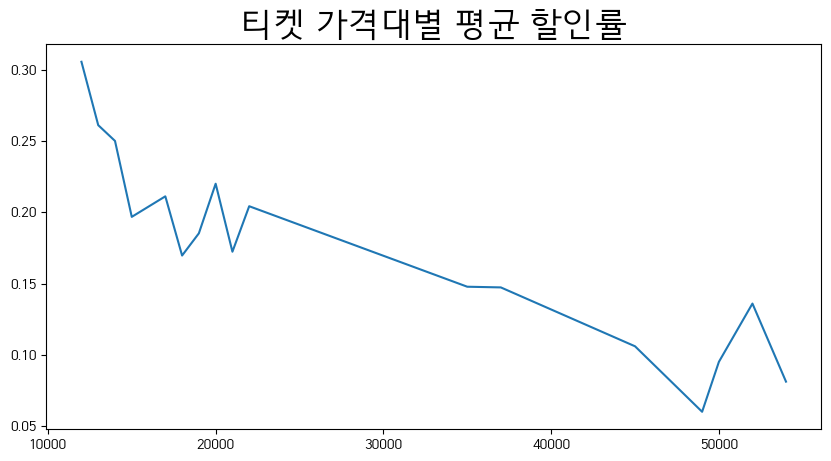

In [7550]:
x = pd.DataFrame(ticketprice[ticketprice.disc_type != 'none'].groupby(['ticketprice'])['percent'].mean()).index
y = pd.DataFrame(ticketprice[ticketprice.disc_type != 'none'].groupby(['ticketprice'])['percent'].mean()).percent
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,y)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('티켓 가격대별 평균 할인률', fontdict=title_font)
plt.show()


저가 좌석티켓의 할인률은 평균(22%)할인률을 상회함<br>
고가 좌석티켓의 할인률은 가격을 고려해도 높지않음. 

In [7551]:
bins = [12000, 19000, 26000, 33000, 40000, 47000, 54000]
bins_label = [12000, 19000, 26000, 33000, 40000, 47000, 54000]
ticketprice["level"] = pd.cut(ticketprice["ticketprice"], bins, right=False, labels=bins_label[:-1])
ticketprice.level.unique()

[19000, 12000, 33000, 47000, 40000, NaN]
Categories (6, int64): [12000 < 19000 < 26000 < 33000 < 40000 < 47000]

In [7552]:
amount_s = pd.Series(ticketprice[ticketprice.disc_type == 'amount'].level.value_counts().sort_index() / ticketprice[ticketprice.disc_type != 'none'].level.value_counts().sort_index()).astype(float)*100

In [7553]:
percent_s = pd.Series(ticketprice[ticketprice.disc_type == 'percent'].level.value_counts().sort_index() / ticketprice[ticketprice.disc_type != 'none'].level.value_counts().sort_index()).astype(float)*100

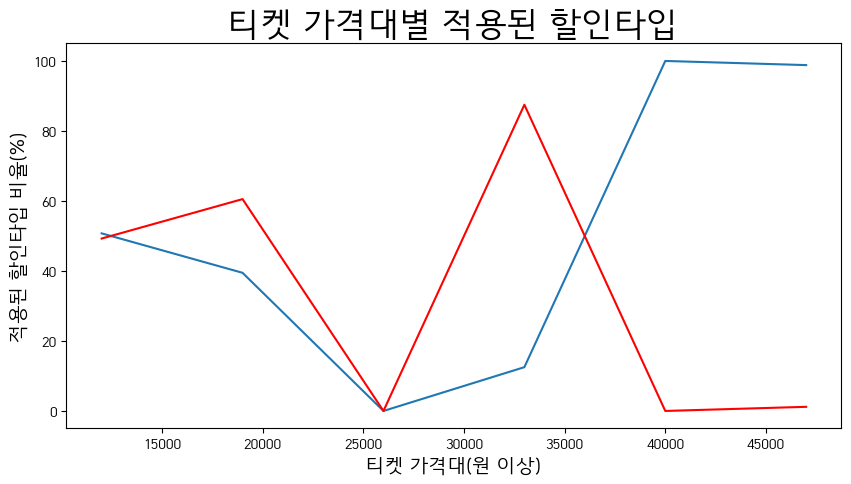

In [7554]:
x1 = [12000, 19000, 26000, 33000, 40000, 47000]
x2 = [12000, 19000, 26000, 33000, 40000, 47000]
y1 = amount_s.fillna(0)
y2 = percent_s.fillna(0)
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x1,y1,x2,y2,'r-')
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('티켓 가격대별 적용된 할인타입', fontdict=title_font)
plt.xlabel('티켓 가격대(원 이상)', fontdict=label_font)
plt.ylabel('적용된 할인타입 비율(%)', fontdict=label_font)
plt.show()

구단의 할인정책으로 인해 퍼센트 할인쿠폰(문화누리카드 등)은 고가의 좌석에서 활용할 수 없음.<br>
그럼에도 불구하고, 3만원이상에서 퍼센트 할인쿠폰의 사용량은 높음. 어떤 쿠폰일까?

In [7555]:
ticket.loc[ticketprice[(ticketprice.ticketprice < 30000)&(ticketprice.disc_type == 'percent')].index].proname.value_counts() # 3만원미만 티켓의 퍼센트할인 적용 구매수

예매권북                  4924
문화누리카드(성인)             439
ㅅㅇ전 게임권                366
1인 테이블석 할인권             49
롯데백화점 30% 할인쿠폰(성인)       5
1인 테이블석 50% 할인쿠폰         5
10% 할인 쿠폰(성인)            1
10% 할인 쿠폰(청소년/어린이)       1
Name: proname, dtype: int64

In [7556]:
ticket.loc[ticketprice[(ticketprice.ticketprice > 30000)&(ticketprice.disc_type == 'percent')].index].proname.value_counts() # 3만원이상 티켓의 퍼센트할인 적용 구매수

예매권북                 923
프리미엄 골드석 50% 할인쿠폰      2
Name: proname, dtype: int64

거의 예매권북(15%) 할인임을 알 수 있음.<br>
그렇다면 예매권북으로 구매되는 좌석들은 어떤 특성이 있을까?

In [7557]:
ticket[ticket.proname == '예매권북'].product_grade_name.value_counts()

World class석    1990
S석              1147
Exciting석        993
프리미엄 클래식         923
With석            539
Expert석          136
Wide view석        80
1인 테이블석           39
Name: product_grade_name, dtype: int64

In [7558]:
round(len(ticket[(ticket.proname == '예매권북') & (ticket.product_grade_name == '프리미엄 클래식')]) / len(ticket[ticket.proname == '예매권북'])*100 , 2)
# 예매권북으로 구매한 전체 티켓중 '프리미엄 클래식' 좌석의 비율

15.79

In [7559]:
round(len(ticket[ticket.product_grade_name=='프리미엄 클래식']) / len(ticket)*100 , 2)
# 전체 좌석구매 중 '프리미엄 클래식' 좌석의 비율

2.86

예매권북으로 구매한 좌석 중 [프리미엄 클래식] 좌석비율은 전체 좌석구매 중 [프리미엄 클래식] 좌석비율의 6배 높은 수준임.

In [7560]:
ticket.loc[ticketprice[(ticketprice.ticketprice > 30000)&(ticketprice.disc_type == 'amount')].index].amount.value_counts() # 정량할인으로 3만원이상 티켓을 구매할때 적용되는 할인금액 비율

5000.0    288
3000.0     46
1000.0      2
Name: amount, dtype: int64

In [7561]:
ticket[ticket.amount != 0].amount.value_counts() # 2022년동안 사용된 정량할인쿠폰 할인금액 비율

5000.0     3914
3000.0     1460
1000.0       43
10000.0       3
Name: amount, dtype: int64

# 프로모션 할인률 책정

퍼센트 쿠폰은 15000 이하 구간보다 20000이하 구간에서 더 많이 사용되고 있는것으로 보아 <br>
**퍼센트 할인을 받을 수 있을때 할인혜택을 높게 받을 수 있는 W석을 고려할 확률이 높아짐을 알 수 있음.**<br>

예매권북으로 구매한 좌석 중 [프리미엄 클래식] 좌석비율은 전체 좌석구매 중 [프리미엄 클래식] 좌석비율의 6배 높은 수준임.<br>
예매권북은 전 좌석에서 15%수준의 할인률을 보이지만, 예매권북으로 사전 구입가능한 좌석 중 프리미엄 클래식 좌석에서 최고 할인금액(5000-7000원상당)을 보이기 때문에 <br>
**[프리미엄 클래식] 좌석을 구매할 예정이라면 예매권북을 구입하는 것이 유리하다 할 수 있음.**

정량쿠폰은 어디에 사용하더라도 같은 비용절감이 가능하지만, <br>
3만원 이상의 티켓에서 액면가가 큰 쿠폰인 5천원 할인이 비율상 더 많이 적용된 것으로 보아<br>
**정량쿠폰도 액면할인가가 높을수록 고급좌석구매를 결정짓는데 다소 영향을 준다고 할 수 있음.**

정량쿠폰으로 저가 좌석을 구매해서 높은 할인률을 적용받는 것이 수익성을 떨어트리는데 일조하고 있음(E석/S석).
제공되는 정량 포인트쿠폰의 일부를 퍼센트쿠폰으로 돌려서 저가 좌석의 할인률을 낮추고 고급좌석으로 유도하는방법을 고려해볼 필요 있음.

고가 좌석의 일부를 사전결제형(선착순100명)으로 운영하며 프리미엄 좌석 수요조절과 구매도 확정짓는 현행 예매권북 시스템은 아주 좋음.  
추가로, 예매권북 외에도 고가 좌석에만 사용할 수 있는 이벤트성 퍼센트 쿠폰(10% 수준의)을 불시에 제공한다면, <br>
퍼센트 쿠폰으로 받을 수 있는 최고할인률을 얻기위해 고급 좌석을 구매하기로 결정할 확률이 높아질 것으로 예상됨.<br>
예매권북은 사전결제형(구독형) 쿠폰이므로, 그 가치를 떨어트리지 않는 선에서 고급좌석의 퍼센트쿠폰을 고려해볼 필요가 있음.

In [7562]:
ticketprice.replace({'cancel_yn': {'Y':1, 'N':0}},inplace=True)
ticketprice.drop(columns=['amount', 'percent'], inplace=True)

In [7563]:
ticketprice

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,cancel_yn,accesstime,event_weekday,total,disc_type,level
0,291,2022-02-19,16,주말,스플릿일반,2,20000,1,6706.0,5,15000.0,amount,19000
37,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,12000
38,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,12000
39,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,12000
40,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,12000
52230,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,12000
52231,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,12000
52232,118329,2022-10-16,19,주말,파이널A,4,14000,0,-26.0,6,14000.0,none,12000


In [7564]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics

In [7565]:
canceled_ticket = ticketprice[ticketprice['cancel_yn']== 1]
used_ticket = ticketprice[ticketprice['cancel_yn']== 0]
n_samples = 8000
canceled_ticket_downsampled = resample(canceled_ticket,
                                replace = False, 
                                n_samples = n_samples,
                                random_state = 0)
used_ticket_downsampled = resample(used_ticket,
                                replace = False,
                                n_samples = n_samples,
                                random_state = 0)
downsampled = pd.concat([canceled_ticket_downsampled, used_ticket_downsampled])
downsampled['cancel_yn'].value_counts()

1    8000
0    8000
Name: cancel_yn, dtype: int64

In [7566]:
downsampled = downsampled[['game_time', 'weekday', 'game_type_name', 'ranking_y', 'ticketprice', 'total', 'disc_type', 'cancel_yn', 'accesstime', 'event_weekday']]
# 셔플 전, 사용할 특성
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
downsampled.loc[:,'weekday'] = encoder.fit_transform(downsampled.loc[:,'weekday'].copy())
downsampled.loc[:,'game_type_name'] = encoder.fit_transform(downsampled.loc[:,'game_type_name'].copy())
downsampled.loc[:,'disc_type'] = encoder.fit_transform(downsampled.loc[:,'disc_type'].copy())
downsampled 
# ticketprice와 total의 scale조정은 필요없음(트리분류모델은 노드에서 하나의 값을 기준으로 분기되므로 스케일과 성능이 연관되지않음.)

C:\Users\efoxh\AppData\Local\Temp\ipykernel_18484\1587472587.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  downsampled.loc[:,'weekday'] = encoder.fit_transform(downsampled.loc[:,'weekday'].copy())
C:\Users\efoxh\AppData\Local\Temp\ipykernel_18484\1587472587.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  downsampled.loc[:,'game_type_name'] = encoder.fit_transform(downsampled.loc[:,'game_type_name'].copy())
C:\Users\efoxh\AppData\Local\Temp\ipykernel_18484\1587472587.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = n

,game_time,weekday,game_type_name,ranking_y,ticketprice,total,disc_type,cancel_yn,accesstime,event_weekday
20252,16,1,0,4,13000,13000.0,1,1,5311.0,6
14973,16,0,0,4,19000,19000.0,1,1,368.0,6
30202,19,1,0,4,19000,19000.0,1,1,1154.0,5
25732,19,2,0,5,12000,12000.0,1,1,7491.0,2
47,16,1,0,2,19000,16150.0,2,1,7343.0,5
...,...,...,...,...,...,...,...,...,...,...
4158,14,1,0,4,12000,12000.0,1,0,5715.0,5
28332,19,1,0,4,19000,19000.0,1,0,6083.0,5
45800,16,1,1,4,15000,15000.0,1,0,142.0,5
43531,16,1,1,4,21000,21000.0,1,0,4326.0,5


In [7567]:
X = downsampled[downsampled.columns.difference(['cancel_yn'], sort = False)]
y = downsampled['cancel_yn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7568]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(12800, 9) (12800,) (3200, 9) (3200,)


In [7569]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

#예매 이탈 예측모델
model = XGBClassifier(objective="binary:logistic", eval_metric="error", n_estimators=1000, random_state=42, learning_rate=0.1, max_depth=8, min_child_weight=2)
params = {
    "max_leaves":[4, 6, 8],
    "max_depth":[4, 6, 8], 
    "min_child_weight":[4, 6, 8]
}
grid_search = GridSearchCV(model, param_grid=params, scoring="roc_auc", cv=3, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='error', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0....,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=8,
                                     max_leaves=None, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1000, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [4, 6, 8], 'max_leaves': [4, 6, 8],
                         'min_child_weight': [4, 6, 8]},
             scoring='roc_auc', verbose=1)

In [7570]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").T

,24,21,18,22,19,25,9,15,12,26,...,11,6,3,0,7,4,1,8,5,2
mean_fit_time,2.264333,2.211999,2.114001,2.141999,2.078333,2.118,1.708667,1.668666,1.672667,2.098,...,1.647666,1.197333,1.177999,1.217333,1.194333,1.174,1.197334,1.188333,1.199,1.177668
std_fit_time,0.011086,0.016083,0.025664,0.009273,0.008179,0.036121,0.017442,0.031383,0.018209,0.022761,...,0.026399,0.029101,0.014989,0.006342,0.007319,0.007257,0.011145,0.006945,0.03269,0.019362
mean_score_time,0.013,0.014667,0.012,0.014667,0.012,0.012,0.010667,0.010334,0.009666,0.014,...,0.010001,0.008667,0.009,0.008,0.009336,0.009001,0.008333,0.009,0.008666,0.009334
std_score_time,0.001414,0.001247,0.0,0.000471,0.0,0.000001,0.000471,0.000471,0.000943,0.001632,...,0.000001,0.000472,0.000817,0.000816,0.000471,0.001632,0.001247,0.001415,0.000943,0.001246
param_max_depth,8,8,8,8,8,8,6,6,6,8,...,6,4,4,4,4,4,4,4,4,4
param_max_leaves,8,6,4,6,4,8,4,8,6,8,...,4,8,6,4,8,6,4,8,6,4
param_min_child_weight,4,4,4,6,6,6,4,4,4,8,...,8,4,4,4,6,6,6,8,8,8
params,"{'max_depth': 8, 'max_leaves': 8, 'min_child_w...","{'max_depth': 8, 'max_leaves': 6, 'min_child_w...","{'max_depth': 8, 'max_leaves': 4, 'min_child_w...","{'max_depth': 8, 'max_leaves': 6, 'min_child_w...","{'max_depth': 8, 'max_leaves': 4, 'min_child_w...","{'max_depth': 8, 'max_leaves': 8, 'min_child_w...","{'max_depth': 6, 'max_leaves': 4, 'min_child_w...","{'max_depth': 6, 'max_leaves': 8, 'min_child_w...","{'max_depth': 6, 'max_leaves': 6, 'min_child_w...","{'max_depth': 8, 'max_leaves': 8, 'min_child_w...",...,"{'max_depth': 6, 'max_leaves': 4, 'min_child_w...","{'max_depth': 4, 'max_leaves': 8, 'min_child_w...","{'max_depth': 4, 'max_leaves': 6, 'min_child_w...","{'max_depth': 4, 'max_leaves': 4, 'min_child_w...","{'max_depth': 4, 'max_leaves': 8, 'min_child_w...","{'max_depth': 4, 'max_leaves': 6, 'min_child_w...","{'max_depth': 4, 'max_leaves': 4, 'min_child_w...","{'max_depth': 4, 'max_leaves': 8, 'min_child_w...","{'max_depth': 4, 'max_leaves': 6, 'min_child_w...","{'max_depth': 4, 'max_leaves': 4, 'min_child_w..."
split0_test_score,0.737017,0.737017,0.737017,0.728461,0.728461,0.728461,0.723079,0.723079,0.723079,0.724801,...,0.717301,0.710547,0.710547,0.710547,0.704191,0.704191,0.704191,0.704423,0.704423,0.704423
split1_test_score,0.739616,0.739616,0.739616,0.732336,0.732336,0.732336,0.729542,0.729542,0.729542,0.729952,...,0.724629,0.716264,0.716264,0.716264,0.713562,0.713562,0.713562,0.710546,0.710546,0.710546


In [7571]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 AUC: ", grid_search.best_score_)

최적 하이퍼파라미터:  {'max_depth': 8, 'max_leaves': 4, 'min_child_weight': 4}
최적 AUC:  0.7385048028912133


In [7572]:
model = grid_search.best_estimator_.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [7573]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.716875
Precision: 0.7077380952380953
Recall: 0.7412718204488778


In [7574]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='roc_auc',
    n_iter=5,
    random_state=0)

permuter.fit(X_test, y_test)

PermutationImportance(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='error',
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=8,
                                              max_leaves=4, min_child_weight=4,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=1000, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42, ...),
                      random_state=0, scoring='roc_auc')

In [7575]:
feature_names = list(X_test.columns)

eli5.show_weights(
    permuter,
    top=None, 
    feature_names=feature_names,
)
     

Weight,Feature
0.2481 ± 0.0178,accesstime
0.0550 ± 0.0015,total
0.0382 ± 0.0063,game_time
0.0354 ± 0.0062,ticketprice
0.0322 ± 0.0045,weekday
0.0222 ± 0.0059,event_weekday
0.0174 ± 0.0046,ranking_y
0.0115 ± 0.0027,game_type_name
0.0071 ± 0.0034,disc_type


# 순열중요도로 보는 예매취소율에 영향을 미치는 특성
accesstime(예매/취소 시간) <br>
total(할인률을 고려한 최종티켓값) <br>
game_time(경기시작시간) <br>
week_day(공휴일/주말/평일) <br>

In [7576]:
bins = list(range(7000, 56001, 7000))
bins_label = list(range(7000, 56001, 7000))
ticketprice["level"] = pd.cut(ticketprice["total"], bins, right=False, labels=bins_label[:-1])

In [7577]:
ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index()

7000     4135
14000    3524
21000     297
28000     184
35000     152
42000      78
49000     152
Name: level, dtype: int64

In [7578]:
ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index()

7000     21568
14000    15272
21000     1067
28000      871
35000      360
42000      342
49000      664
Name: level, dtype: int64

In [7579]:
pd.Series(ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index() / ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index()).astype(float)*100

7000     19.171921
14000    23.074908
21000    27.835052
28000    21.125144
35000    42.222222
42000    22.807018
49000    22.891566
Name: level, dtype: float64

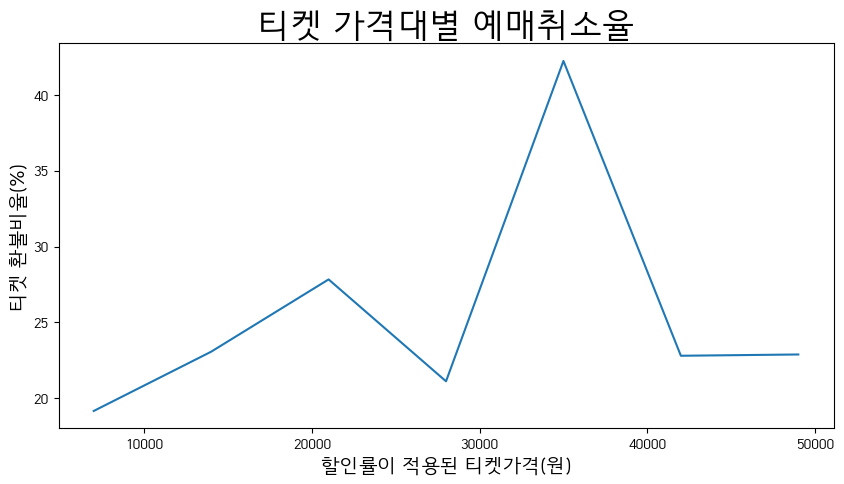

In [7580]:
x = list(range(7000, 56000, 7000))
y = pd.Series(ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index() / ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index()).astype(float)*100
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,y)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('티켓 가격대별 예매취소율', fontdict=title_font)
plt.xlabel('할인률이 적용된 티켓가격(원)', fontdict=label_font)
plt.ylabel('티켓 환불비율(%)', fontdict=label_font)
plt.show()

In [7581]:
ticket[ticket.cancel_yn == 'Y'].groupby(['product_grade_name'])['cancel_yn'].count()

product_grade_name
1인 테이블석           512
Exciting석        2497
Expert석           210
N석                 31
S석               2415
Wide view석         78
With석             538
World class석     1677
스카이라운지             52
프리미엄 골드            74
프리미엄 클래식          279
피크닉 테이블석(2인)       54
하이네켄 테이블석(2인)     107
Name: cancel_yn, dtype: int64

In [7582]:
(ticket[ticket.cancel_yn == 'Y'].groupby(['product_grade_name'])['cancel_yn'].count() / ticket[ticket.cancel_yn == 'N'].groupby(['product_grade_name'])['cancel_yn'].count()).sort_values()

product_grade_name
Expert석          0.118711
Wide view석       0.157258
피크닉 테이블석(2인)     0.177632
With석            0.193178
S석               0.199077
Exciting석        0.199489
하이네켄 테이블석(2인)    0.234649
프리미엄 클래식         0.251125
World class석     0.258238
프리미엄 골드          0.283525
1인 테이블석          0.307323
스카이라운지           0.485981
N석               0.659574
Name: cancel_yn, dtype: float64

21000원 - 35000원 사이의 티켓이 환불비율이 높음. <br>
저가/프리미엄 티켓은 20%대 환불비율을 보여줌
환불비율 높은 좌석 = 1인 테이블석(20000), 스카이라운지(35000), N석(12000)

In [7583]:
ticketprice[ticketprice.cancel_yn == 1].groupby(['accesstime'])['total'].count()
bins = list(range(0, 11521, 1440))
bins_label = list(range(0, 11521, 1440))
ticketprice["level"] = pd.cut(ticketprice["accesstime"], bins, right=False, labels=bins_label[:-1])
ticketprice

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,cancel_yn,accesstime,event_weekday,total,disc_type,level
0,291,2022-02-19,16,주말,스플릿일반,2,20000,1,6706.0,5,15000.0,amount,5760
37,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
38,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
39,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
40,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52230,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52231,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52232,118329,2022-10-16,19,주말,파이널A,4,14000,0,-26.0,6,14000.0,none,NaN


In [7584]:
ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index() # 당일(0) 취소하는 인원이 적지않음.

0        1789
1440     1011
2880      870
4320     1482
5760     2220
7200     1008
8640       45
10080      69
Name: level, dtype: int64

In [7585]:
ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index() # 당일(0) 예매하는 인원이 많음

0        12352
1440      4254
2880      3618
4320      6350
5760      8937
7200      4132
8640       139
10080      192
Name: level, dtype: int64

In [7586]:
pd.Series(ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index() / ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index()).astype(float)*100

0        14.483484
1440     23.765867
2880     24.046434
4320     23.338583
5760     24.840551
7200     24.394966
8640     32.374101
10080    35.937500
Name: level, dtype: float64

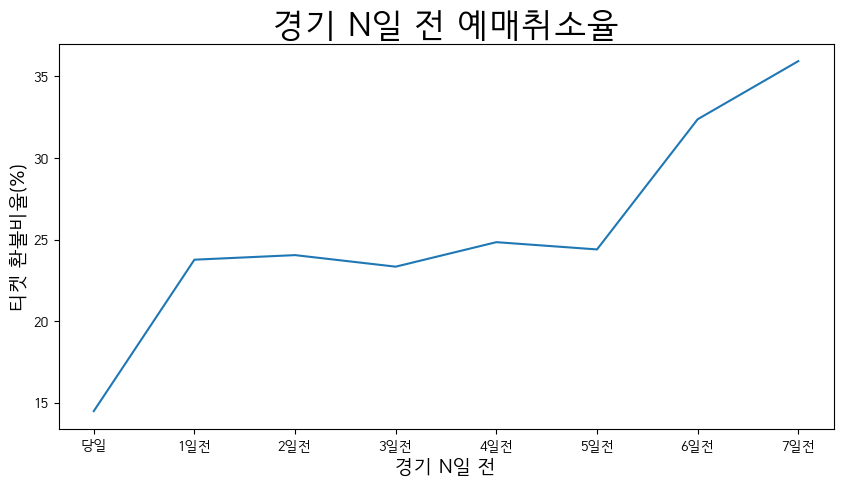

In [7587]:
x = ['당일','1일전','2일전','3일전','4일전','5일전','6일전','7일전']
y = pd.Series(ticketprice[ticketprice.cancel_yn == 1].level.value_counts().sort_index() / ticketprice[ticketprice.cancel_yn == 0].level.value_counts().sort_index()).astype(float)*100
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,y)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('경기 N일 전 예매취소율', fontdict=title_font)
plt.xlabel('경기 N일 전', fontdict=label_font)
plt.ylabel('티켓 환불비율(%)', fontdict=label_font)
plt.show()

경기6일전부터 환불비율이 낮아지고(35% > 25%), <br>
경기당일 판매되는 티켓은 환불비율이 15%로 급격히 떨어짐

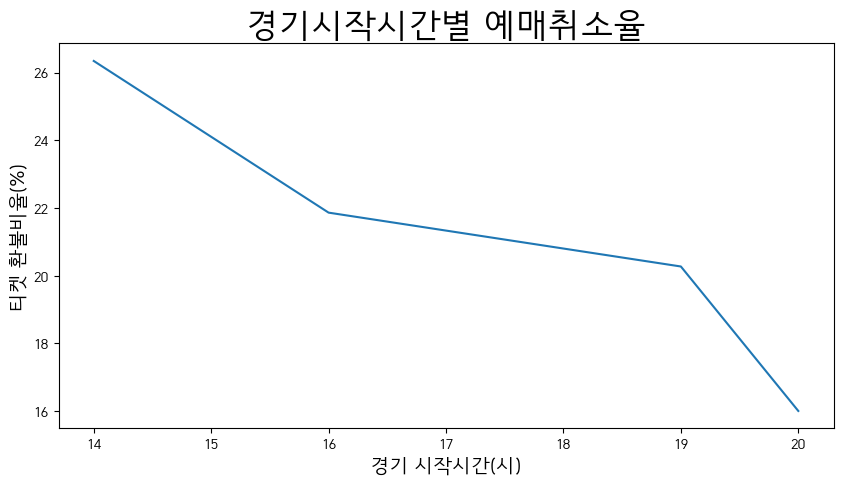

In [7588]:
x = ticketprice[ticketprice.cancel_yn == 1].groupby(['game_time'])['total'].count().index
y = pd.Series(ticketprice[ticketprice.cancel_yn == 1].groupby(['game_time'])['total'].count() / ticketprice[ticketprice.cancel_yn == 0].groupby(['game_time'])['total'].count()).astype(float)*100
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(x,y)
title_font = {
    'fontsize': 24,
    'fontweight': 'bold'
}
plt.title('경기시작시간별 예매취소율', fontdict=title_font)
plt.xlabel('경기 시작시간(시)', fontdict=label_font)
plt.ylabel('티켓 환불비율(%)', fontdict=label_font)
plt.show()

경기시작시간이 이른시간 일수록 이탈률이 높고, 늦은시간일수록 이탈률이 낮음

In [7589]:
ticketprice[ticketprice.weekday=='평일'].game_time.unique() # 평일은 19시 시작

array([19])

In [7590]:
ticketprice[ticketprice.weekday=='평일'].cancel_yn.value_counts()[1] / ticketprice[ticketprice.weekday=='평일'].cancel_yn.value_counts()[0] *100
# 평일 경기 예매취소율

16.651075771749298

# 예매 이탈률 요인분석
1. 경기 당일까지 남은일수
- 남은일수 6일 이후로는 이탈률이 높아짐(당일 관람 불확정성으로 인한 이탈, 좌석변경 등)
- 남은일수 5일 이내로는 이탈률이 다소 낮아짐(원하는 좌석을 확보한 후 변동폭 적음)
- 경기 당일 예매 고객은 이탈률이 낮음(당일 약속, 가는길에, 혹은 경기장앞에서 예매 등 확정성 높음)
- 당일 이탈자가 적지않으나, 당일 예매자가 많아서 이탈률이 상대적으로 감소
2. 티켓가격별
- 할인을 고려한 가격으로 2.1만원 - 3.5만원 선의 좌석이 이탈률이 높음
- 오히려 프리미엄석,스카이라운지 같은 4만원 이상 고가 좌석은 이탈률이 높지않음.
- 환불비율 높은 좌석순 = N석(12000 / 66% ), 스카이라운지(35000 / 48% ), 1인 테이블석(20000 / 30% )
  - N석: 원정석 근처, 지붕없음(우천시, 혹서기 등 비선호 좌석)
  - 스카이라운지, 1인 테이블석 : 비교적 높은 가격대비 좌석 만족도가 높지않을 가능성이 높음. <br>
    가격조정 혹은 여건개선이 필요한지 고려할 필요 있음, 경기장 모서리부분의 좌석 뷰와 환불비율 연관성 파악
3. 경기 시작시간
- 평일/휴일 무관하게 경기 시작시간이 이를수록 예매취소율이 높음
- 평일은 경기 시작시간이 19시 고정?, 늦은시간이기 때문에 16% 취소율로 평일이 가장 낮은 취소율을 보여주고 있음.

# RFM 기반 유저(필요특성 = user_id) 세그먼테이션 & 유형분석
Recency, 최근에 (필요특성 = date)<br>
Frequency, 어떤빈도로 (필요특성 = user_session, event_time)<br>
Monetary 얼마나 많이 (필요특성 = total)<br>
지출(필요특성 = event_type == purchase)했는지 분석해보자.

In [7591]:
ticketprice

,membership_no,date,game_time,weekday,game_type_name,ranking_y,ticketprice,cancel_yn,accesstime,event_weekday,total,disc_type,level
0,291,2022-02-19,16,주말,스플릿일반,2,20000,1,6706.0,5,15000.0,amount,5760
37,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
38,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
39,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
40,86916,2022-02-19,16,주말,스플릿일반,2,12000,1,7122.0,5,7000.0,amount,5760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52229,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52230,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52231,139589,2022-10-16,19,주말,파이널A,4,15000,0,-5.0,6,15000.0,none,NaN
52232,118329,2022-10-16,19,주말,파이널A,4,14000,0,-26.0,6,14000.0,none,NaN


In [7592]:
recency = ticketprice[ticketprice.cancel_yn == 0].groupby(['membership_no'])['date'].max() # 최근에 언제 구매했는지
recency

membership_no
137       2022-05-29
153       2022-10-16
180       2022-05-08
208       2022-10-16
291       2022-10-16
             ...    
151967    2022-10-16
151968    2022-10-16
151972    2022-10-16
151980    2022-10-16
151981    2022-10-16
Name: date, Length: 6557, dtype: object

In [7593]:
frequency = ticketprice[ticketprice.cancel_yn == 0].groupby(['membership_no'])['accesstime'].count() # 몇번 주문했는지
frequency

membership_no
137        2
153       12
180        1
208       15
291       46
          ..
151967     3
151968     1
151972     4
151980     1
151981     2
Name: ticketprice, Length: 6557, dtype: int64

In [7594]:
monetary = ticketprice[ticketprice.cancel_yn == 0].groupby(['membership_no'])['total'].sum() # 얼마나 주문했는지
monetary = monetary/1000 # log 취하기전에 천원단위로 단위감소(고른 scaling을 위해)
monetary

membership_no
137       100.00
153       150.00
180        14.00
208       146.00
291       546.75
           ...  
151967     45.00
151968     15.00
151972     51.00
151980     14.00
151981     30.00
Name: total, Length: 6557, dtype: float64

In [7595]:
import datetime as dt

rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.rename(columns = {'date':'R', 'ticketprice':'F', 'total':'M'}, inplace=True)
rfm['R'] = pd.to_datetime(rfm['R'])
rfm['R'] = (dt.datetime(2022,10,17) - rfm['R']).astype('timedelta64[D]')
rfm

,R,F,M
membership_no,,,
137,141.0,2,100.00
153,1.0,12,150.00
180,162.0,1,14.00
208,1.0,15,146.00
291,1.0,46,546.75
...,...,...,...
151967,1.0,3,45.00
151968,1.0,1,15.00
151972,1.0,4,51.00


In [7596]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6557 entries, 137 to 151981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       6557 non-null   float64
 1   F       6557 non-null   int64  
 2   M       6557 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 204.9 KB


In [7597]:
rfm.describe() # 편차심함

,R,F,M
count,6557.000000,6557.000000,6557.000000
mean,82.123227,6.122312,94.202959
std,82.311497,7.548702,115.848442
min,1.000000,1.000000,7.000000
25%,6.000000,2.000000,28.900000
50%,51.000000,3.000000,54.000000
75%,162.000000,7.000000,108.000000
max,240.000000,79.000000,1209.000000


In [7598]:
rfm['R'] = np.log(rfm['R'])
rfm['F'] = np.log(rfm['F'])
rfm['M'] = np.log(rfm['M'])
rfm.describe()

,R,F,M
count,6557.000000,6557.000000,6557.000000
mean,3.314302,1.362732,4.080587
std,1.955226,0.884396,0.920349
min,0.000000,0.000000,1.945910
25%,1.791759,0.693147,3.363842
50%,3.931826,1.098612,3.988984
75%,5.087596,1.945910,4.682131
max,5.480639,4.369448,7.097549


In [7599]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(rfm_scaled)
  sse[k] = kmeans.inertia_

c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\efoxh\anaco

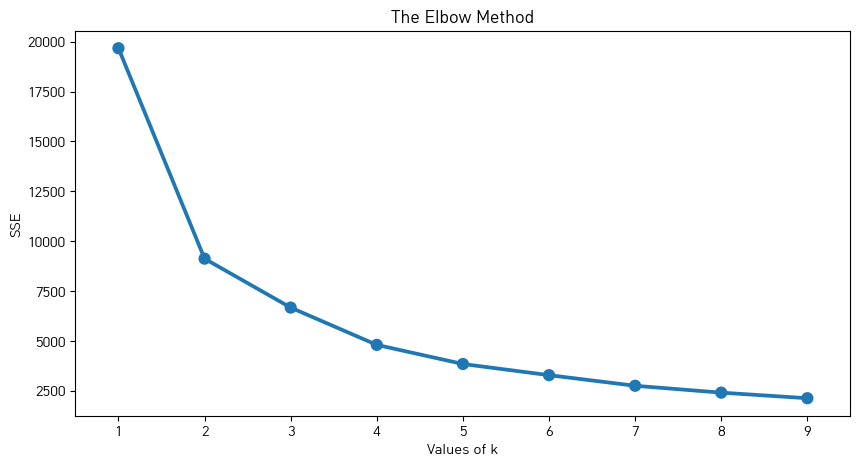

In [7600]:
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [7601]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_
rfm_k3 = rfm.assign(Cluster = cluster_labels)

c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7602]:
rfm_k3.groupby(['Cluster']).agg({
    'R': 'mean',
    'F': 'mean',
    'M': ['mean','count']
}).round(0)

R    F    M      
        mean mean mean count
Cluster                     
0        1.0  2.0  5.0  1501
1        4.0  1.0  3.0  2921
2        4.0  2.0  4.0  2135

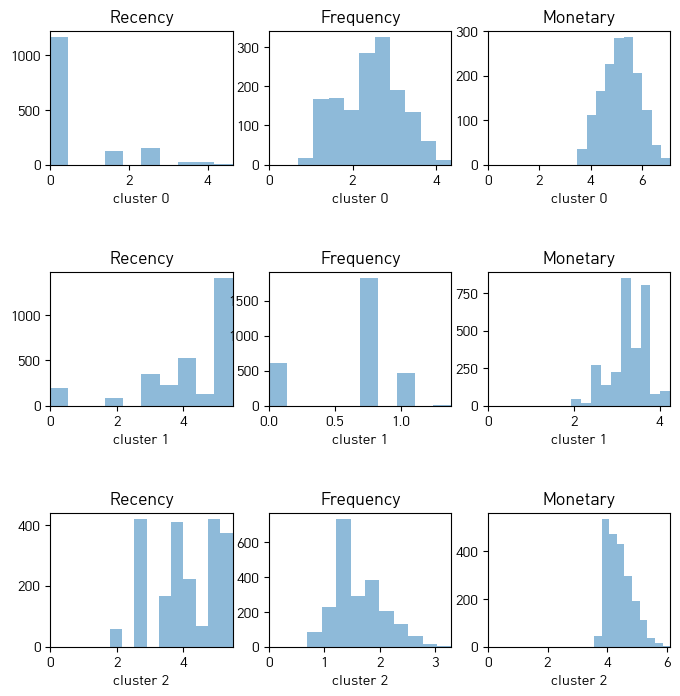

In [7603]:
cluster_0 = rfm_k3[rfm_k3.Cluster == 0]
cluster_1 = rfm_k3[rfm_k3.Cluster == 1]
cluster_2 = rfm_k3[rfm_k3.Cluster == 2]
varr = [cluster_0.R, cluster_1.R, cluster_2.R]
varf = [cluster_0.F, cluster_1.F, cluster_2.F]
varm = [cluster_0.M, cluster_1.M, cluster_2.M]
cluster = ['cluster 0', 'cluster 1', 'cluster 2']

fig, ax = plt.subplots(3,3, figsize=[8,8])

for i in range(len(varr)):
  variable= varr[i]
  ax[i][0].hist(variable, alpha=0.5)
  ax[i][0].set_xlim(0, varr[i].max())
  ax[i][0].set_xlabel(f'{cluster[i]}')
  ax[i][0].set_title('Recency')

for i in range(len(varf)):
  variable= varf[i]
  ax[i][1].hist(variable, alpha=0.5)
  ax[i][1].set_xlim(0, varf[i].max())
  ax[i][1].set_xlabel(f'{cluster[i]}')
  ax[i][1].set_title('Frequency')

for i in range(len(varm)):
  variable= varm[i]
  ax[i][2].hist(variable, alpha=0.5)
  ax[i][2].set_xlim(0, varm[i].max())
  ax[i][2].set_xlabel(f'{cluster[i]}')
  ax[i][2].set_title('Monetary')

plt.subplots_adjust(hspace=0.8)

In [7604]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=42)
kmeans.fit(rfm_scaled)

# 고객별 클러스터 지정
cluster_labels = kmeans.labels_
rfm_k5 = rfm.assign(Cluster = cluster_labels)

c:\Users\efoxh\anaconda3\envs\cp2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7605]:
rfm_k5.groupby(['Cluster']).agg({
    'R': 'mean',
    'F': 'mean',
    'M': ['mean','count']
}).round(0)

R    F    M      
        mean mean mean count
Cluster                     
0        5.0  1.0  3.0  2089
1        0.0  3.0  6.0   839
2        4.0  1.0  4.0  1981
3        4.0  2.0  5.0   929
4        0.0  1.0  4.0   719

C0 : 과거에 한두번 저가티켓을 예매한 고객<br>
C1 : 최근에 자주 고가티켓을 예매한 고객<br>
C2 : 몇달전에 한두번 예매한 고객<br>
C3 : 몇달전에 종종 예매한 고객<br>
C4 : 최근에 한두번 예매한 고객

In [7606]:
rfm_k5['R'] = np.exp(rfm_k5['R'])
rfm_k5['F'] = np.exp(rfm_k5['F'])
rfm_k5['M'] = np.exp(rfm_k5['M'])*1000
rfm_k5.describe()

,R,F,M,Cluster
count,6557.000000,6557.000000,6.557000e+03,6557.000000
mean,82.123227,6.122312,9.420296e+04,1.595852
std,82.311497,7.548702,1.158484e+05,1.348909
min,1.000000,1.000000,7.000000e+03,0.000000
25%,6.000000,2.000000,2.890000e+04,0.000000
50%,51.000000,3.000000,5.400000e+04,2.000000
75%,162.000000,7.000000,1.080000e+05,3.000000
max,240.000000,79.000000,1.209000e+06,4.000000


In [7607]:
rfm_k5

,R,F,M,Cluster
membership_no,,,,
137,141.0,2.0,100000.0,2
153,1.0,12.0,150000.0,1
180,162.0,1.0,14000.0,0
208,1.0,15.0,146000.0,1
291,1.0,46.0,546750.0,1
...,...,...,...,...
151967,1.0,3.0,45000.0,4
151968,1.0,1.0,15000.0,4
151972,1.0,4.0,51000.0,4


In [7608]:
rfm_k5.groupby(['Cluster']).agg({
    'R': 'mean',
    'F': 'mean',
    'M': ['mean','count']
}).round(0)

R     F         M      
          mean  mean      mean count
Cluster                             
0        134.0   2.0   24863.0  2089
1          2.0  20.0  299242.0   839
2        103.0   4.0   60329.0  1981
3         54.0  10.0  163030.0   929
4          2.0   4.0   60806.0   719

C0 : 과거에 한두번 저가티켓을 예매한 고객 >> 5개월 전까지 두번정도 저가형 티켓을 구매한 고객<br>
C0 >> 1회성 고객군, 과거에 한두번 원정석을 구매한 타 클럽 팬덤이거나, 관심도가 떨어지는 고객 <br>

C1 : 최근에 자주 고가티켓을 예매한 고객 >> 이틀 전까지 20번정도 티켓을 예매한 고객 ***시드 마케팅 및 초개인화된 긴밀한 프로모션 진행*** <br>
C1 >> VIP 고객군, 최근까지 자주 티켓을 많이 구매하는 고객. 가족단위로 티켓을 여러개씩 구매하는 고객도 포함됨.<br>

C2 : 몇달전에 한두번 예매한 고객 >> 3개월 전까지 네번정도 티켓을 예매한 고객 ***강화-리텐션전략필요*** <br>
C2 >> 몇달전까지 티켓을 구매했던 고객군으로, 리마인드 전략을 잘 세우면 활성 고객군으로 돌릴 수 있음 <br>

C3 : 몇달전에 종종 예매한 고객 >> 2개월 전까지 10번정도 고가형 티켓을 구매한 고객 ***피드-리텐션전략필요*** <br>
C3 >> 몇달전까지 비교적 고가의 티켓도 많이 구매했던 고객군으로, 최근 왜 구매하지 않는지 원인을 분석해서 리텐션 전략을 세워야 함.<br>

C4 : 최근에 한두번 예매한 고객 >> 이틀 전까지 4번정도 티켓을 예매한 고객 ***프로모션필요*** <br>
C4 >> 최근에 몇번 구매한 고객으로, 프로모션을 적극 제공해야하는 고객군임. 최근 가입하여 구매활동을 시작한 고객도 포함됨.<br>